<h2 style="background-color:salmon;border-radius:5px;text-align:center;padding:15px;color:white;">Project Name: Classification and Analysis of music genres</h2>
<h4>Done by: TEY JIA YING (2027074D)</h4>

<h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;">Overview of Project</h2>

<h3>Overview:</h3>
I have structured the project into 5 key sections. Below, I will share with you the steps I took together with insights for each section.

1. [Data Understanding](#1)
<br><br>
2. [Data Preparation](#2)<br>
    2.1 [Replacing Missing Values](#21)<br>
    2.2 [Removing Duplicates](#22)<br>
    2.3 [Converting duration from ms to min](#23)<br>
    2.4 [Removing Outliers](#24)<br>
<br>
3. [Exploratary Data Analysis](#3)<br>
    3.1 [Descriptive Statistical Analysis](#31)<br>
    3.2 [Correlation Analysis](#32)<br>
    3.3 [Class Analysis](#33)<br>
    3.4 [Further Analysis of Music Charateristics and Class](#35)<br>
 <br>   
4. [Modelling,Evaluation and Prediction](#7)<br>
    4.1  [Preparing Data for Modelling](#8)<br>
    4.2  [Modelling](#9)
    - [Decision Tree Classifier](#10)<br>
    - [Feature Selection](#100)<br>
    - [K-Neighbors Classifier](#11)<br>
    - [Random Forest Classifier](#12)<br>
    - [XGBoost Classifier](#13)<br>
    - [Gradient Boosting Classifier](#14)<br>
    - [Multinomial Nayes Bayes](#15)<br>
    - [Stochastic Gradient Descent(SGD) Classifier](#16)<br>
    - [One-Vs-Rest Classifier](#17)<br>
    - [Neural Network](#18)<br>
<br>
5. [Comparison of models](#5)
<br><br>
6. [Conclusion](#6)

**<b>Note: Click on the links to go to the respective section</b>**

<a id='1'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">1. Data Understanding</h2>

In [1]:
#import all modules
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from scipy import stats
# Tensorflow and Keras are two packages for creating neural network models.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# import NN layers and other componenets.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, BatchNormalization, Dropout
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt # for plotting data and creating different charts.
import numpy as np # for math and arrays
import pandas as pd # data from for the data.
import seaborn as sns # for plotting.
from sklearn import preprocessing
from sklearn import linear_model
from sklearn import datasets

In [2]:
df=pd.read_csv('Data2021.csv')
df

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,35.0,0.166,0.109,7.0,-17.100,0,0.0413,0.993000,0.824000,0.0984,0.1770,171.587,193450.0,3,6
17992,Micatone,All Gone,27.0,0.638,0.223,11.0,-10.174,0,0.0329,0.858000,0.000016,0.0705,0.3350,73.016,257067.0,4,2
17993,Smash Hit Combo,Peine perdue,34.0,0.558,0.981,4.0,-4.683,0,0.0712,0.000030,0.000136,0.6660,0.2620,105.000,216222.0,4,8
17994,Beherit,Salomon's Gate,29.0,0.215,0.805,6.0,-12.757,0,0.1340,0.001290,0.916000,0.2560,0.3550,131.363,219693.0,4,8


In [3]:
df.dtypes

Artist Name            object
Track Name             object
Popularity            float64
danceability          float64
energy                float64
key                   float64
loudness              float64
mode                    int64
speechiness           float64
acousticness          float64
instrumentalness      float64
liveness              float64
valence               float64
tempo                 float64
duration_in min/ms    float64
time_signature          int64
Class                   int64
dtype: object

In [4]:
df.shape

(17996, 17)

<h3>Explanation of Dataset:</h3>

This dataset consists of <b>13 music charcteristics</b> that is used to predict the target variable:

<table>
    <thead>
        <td>Music Characteristics</td>
        <td>Description</td>
    </thead>
    <tr>
        <td>Danceability</td>
        <td>Describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.</td>
    </tr>
    <tr>
        <td>Valence</td>
        <td>Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).</td>
    </tr>
    <tr>
        <td>Energy</td>
        <td>Represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale.</td>
    </tr>
    <tr>
        <td>Tempo</td>
        <td>The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece, and derives directly from the average beat duration.</td>
    </tr>
    <tr>
        <td>Loudness</td>
        <td>The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks.</td>
    </tr>
    <tr>
        <td>Speechiness</td>
        <td>This detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.</td>
    </tr>
    <tr>
        <td>Instrumentalness</td>
        <td>Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”.</td>
    </tr>
    <tr>
        <td>Liveness</td>
        <td>Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live.</td>
    </tr>
    <tr>
        <td>Acousticness</td>
        <td>A confidence measure from 0.0 to 1.0 of whether the track is acoustic.</td>
    </tr>
    <tr>
        <td>Key</td>
        <td>The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on.</td>
    </tr>
    <tr>
        <td>Mode</td>
        <td>Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.</td>
    </tr>
    <tr>
        <td>Duration</td>
        <td>The duration of the track in milliseconds.</td>
    </tr>
    <tr>
        <td>Time Signature</td>
        <td>An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).</td>
    </tr>
</table>

As for the <b>target variable</b> we are going to predict:

In [5]:
df["Class"].unique()

array([ 5, 10,  6,  2,  4,  8,  9,  3,  7,  1,  0], dtype=int64)

There are in total 11 unique classes that represents different type of music such as Folk, Blue, HipHop, Metal Po

There are <b>2 other rows - Artist Name and Track Name</b> that is a unique identifier of each row.

<a id='2'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">2. Data Preparation</h2>

In [6]:
print("Rows, columns: " + str(df.shape))

Rows, columns: (17996, 17)


In [7]:
df.isnull().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

### <a id="21"> 2.1 Replacing Missing Values</a>

I chose not to drop the null values and instead replace it with KNN imputation as total number of missing values for popularity,instrumentalness and key were ranging from 400 to 4300. If I were to drop all it will affect our dataset as we do not have much information on these 3 music characteristics to predict the class

In [8]:
# Import the INNImputer
from sklearn.impute import KNNImputer

# The dfKNN data frame will only have the 3 columns with missing values 
dfKNN = df[['Popularity',"instrumentalness","key"]]

# Create a kNNImputer object and set k=1
imputer = KNNImputer(n_neighbors=5)

# We use the fit_transform() method to perform the imputation
# We also create another DataFrame from the results returned
# by the fit_transform function
dfKNN = pd.DataFrame(imputer.fit_transform(dfKNN))

# We merge back with the rest of the columns (Year and Method)
df = pd.concat([df[["Artist Name","Track Name","danceability","energy","loudness","mode",
                    "speechiness","acousticness","liveness","valence","tempo","duration_in min/ms",
                    "time_signature","Class"]], dfKNN], axis=1, join="inner")
df



,Artist Name,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_in min/ms,time_signature,Class,0,1,2
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,234596.0,4,5,60.0,0.251237,1.0
1,Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,251733.0,4,10,54.0,0.004010,3.0
2,The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,109667.0,4,6,35.0,0.000196,6.0
3,Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,173968.0,4,5,66.0,0.057497,10.0
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,229960.0,4,10,53.0,0.016100,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,193450.0,3,6,35.0,0.824000,7.0
17992,Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,257067.0,4,2,27.0,0.000016,11.0
17993,Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,216222.0,4,8,34.0,0.000136,4.0
17994,Beherit,Salomon's Gate,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,219693.0,4,8,29.0,0.916000,6.0


In [9]:
df.rename(columns={0: "Popularity", 1: "instrumentalness",2:"key"},inplace=True)

In [10]:
df.isnull().sum()

Artist Name           0
Track Name            0
danceability          0
energy                0
loudness              0
mode                  0
speechiness           0
acousticness          0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
Popularity            0
instrumentalness      0
key                   0
dtype: int64


### <a id="22">2.2 Removing duplicates</a>

In [11]:
df.shape

(17996, 17)

In [12]:
print("Number of duplicates in whole dataset:",df.duplicated(keep='first').sum())

Number of duplicates in whole dataset: 0


Looks like there are no duplicates. However, as I scanned through the whole dataset, I realised that there are rows that have duplicated values across all columns except for Class. This would mean that there are 2 exactly songs having the same music characteristic but they of 2 different classes.  Hence, let us drop data with similar values across all columns except for class

In [13]:
print("Number of duplicates across all columns(except for class):",df[['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Popularity',
       'instrumentalness', 'key']].duplicated(keep='first').sum())

Number of duplicates across all columns(except for class): 1673


In [14]:
df_no_class=df[['Artist Name', 'Track Name', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo',
       'duration_in min/ms', 'time_signature', 'Popularity',
       'instrumentalness', 'key']].drop_duplicates(keep=False)

In [15]:
 df=df[df.index.isin(df_no_class.index)]

In [16]:
df.shape

(14838, 17)

Now, that we have dropped duplicates, we are left with 14838 rows.

### <a id="23">2.3 Converting duration from ms to minutes</a>

After scanning through the dataset, I realised that the longest duration is minutes is 30. Hence, I will be converting the values above 30 from miliseconds to minutes.

In [17]:
def convert_to_min(time):
    if time>30: 
        return time/(1000*60)
    else:
        return time 

df['duration_in_min']=df['duration_in min/ms'].apply(convert_to_min)

<ipython-input-17-09a8aa8de0ae>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_in_min']=df['duration_in min/ms'].apply(convert_to_min)


In [18]:
df.drop(['duration_in min/ms'],axis=1,inplace=True)

C:\Users\JiaYi\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### <a id="24"> 2.4 Removing outliers</a>

In [19]:
###Use a new dataframe for numerical columns
df1=df[["danceability","energy","loudness","mode","speechiness","acousticness","liveness","valence","tempo","duration_in_min","time_signature","instrumentalness","key","Popularity","Class"]]
z_scores = stats.zscore(df1)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
print("Number of Outliers:",df.shape[0]-np.count_nonzero(filtered_entries))

Number of Outliers: 1354


In [20]:
df= df[filtered_entries]
df

,Artist Name,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,Class,Popularity,instrumentalness,key,duration_in_min
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,4,5,60.0,0.251237,1.0,3.909933
1,Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,4,10,54.0,0.004010,3.0,4.195550
2,The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,4,6,35.0,0.000196,6.0,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,4,5,66.0,0.057497,10.0,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,4,10,53.0,0.016100,2.0,3.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17991,Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,3,6,35.0,0.824000,7.0,3.224167
17992,Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,4,2,27.0,0.000016,11.0,4.284450
17993,Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,4,8,34.0,0.000136,4.0,3.603700
17994,Beherit,Salomon's Gate,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,4,8,29.0,0.916000,6.0,3.661550


In [21]:
df.reset_index(inplace=True)
df.drop(columns=['index'],inplace=True)
df

,Artist Name,Track Name,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,Class,Popularity,instrumentalness,key,duration_in_min
0,Bruno Mars,That's What I Like (feat. Gucci Mane),0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,4,5,60.0,0.251237,1.0,3.909933
1,Boston,Hitch a Ride,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,4,10,54.0,0.004010,3.0,4.195550
2,The Raincoats,No Side to Fall In,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,4,6,35.0,0.000196,6.0,1.827783
3,Deno,Lingo (feat. J.I & Chunkz),0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,4,5,66.0,0.057497,10.0,2.899467
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,4,10,53.0,0.016100,2.0,3.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,Green-House,Find Home,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,3,6,35.0,0.824000,7.0,3.224167
13480,Micatone,All Gone,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,4,2,27.0,0.000016,11.0,4.284450
13481,Smash Hit Combo,Peine perdue,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,4,8,34.0,0.000136,4.0,3.603700
13482,Beherit,Salomon's Gate,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,4,8,29.0,0.916000,6.0,3.661550


Now that we have removed outliers, it will allow for a better model performance in the later stage

<a id='3'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">3.Exploratory Data Analysis</h2>

<a id="31"><h3>3.1 Descriptive Statistical Analysis</h3></a>
After cleaning the data, we used the describe() function once again to look at the statistical summary of the numerical variables.

In [22]:
describe_df=df.describe()
describe_df

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,Class,Popularity,instrumentalness,key,duration_in_min
count,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000,13484.000000
mean,0.551126,0.652734,-7.830060,0.635494,0.071960,0.265530,0.178511,0.484164,122.106857,3.938891,6.857980,43.952996,0.167114,5.934295,3.855722
std,0.163310,0.233155,3.594211,0.481309,0.063338,0.314791,0.122955,0.240459,29.584804,0.283498,3.155246,17.341515,0.266135,3.074491,1.080495
min,0.059900,0.016300,-20.892000,0.000000,0.022500,0.000000,0.011900,0.018300,42.956000,3.000000,0.000000,1.000000,0.000001,1.000000,0.388667
25%,0.441000,0.488000,-9.677500,0.000000,0.034300,0.005940,0.096900,0.292000,98.812750,4.000000,5.000000,32.000000,0.000227,4.000000,3.136667
50%,0.552000,0.684500,-7.084000,1.000000,0.045900,0.105000,0.125000,0.475000,119.990500,4.000000,8.000000,43.000000,0.015972,6.000000,3.673175
75%,0.666000,0.851000,-5.205000,1.000000,0.079800,0.480000,0.235000,0.670000,141.014000,4.000000,10.000000,56.000000,0.215106,9.000000,4.364504
max,0.989000,1.000000,0.943000,1.000000,0.344000,0.996000,0.680000,0.986000,209.905000,5.000000,10.000000,95.000000,0.996000,11.000000,8.429550


From this dataframe, we may not be able to visualize at one glance the distrbution of all chracteristics. Hence, I have decided to plot the distribution of each characteristics below

### Distribution of each music characteristics

C:\Users\JiaYi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


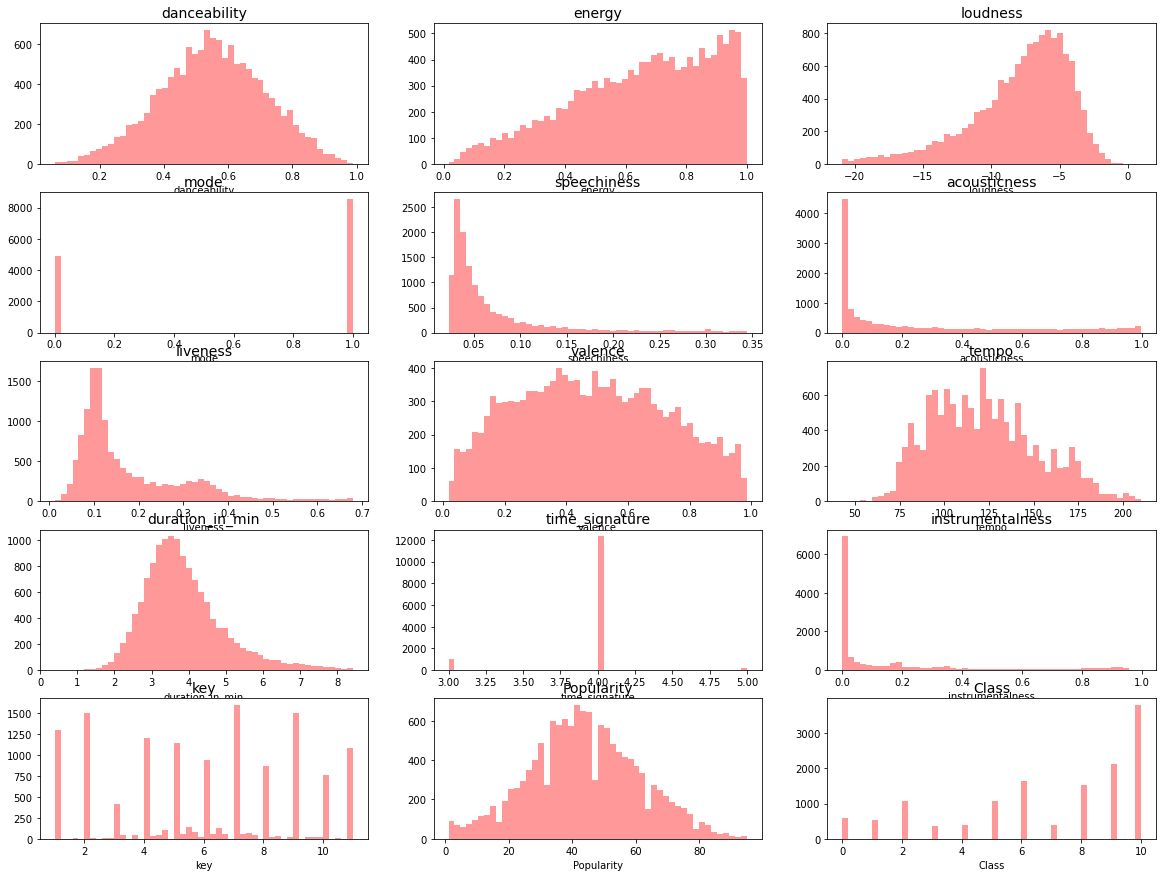

In [23]:

labels =["danceability","energy","loudness","mode","speechiness","acousticness","liveness","valence","tempo","duration_in_min","time_signature","instrumentalness","key","Popularity","Class"]
row, col = 5, 3

fig, ax = plt.subplots(5, 3, figsize=(20,15))
for i in range(5):
    for j in range(3):
        c_type = labels[i*col+j]
        c_ax = ax[i][j]
        dplot=sns.distplot(df[c_type],kde=False,color='red',norm_hist=False,bins=50,ax=c_ax)
        c_ax.set_title(label=c_type,fontdict = {'fontsize': 14})
        
        
       

<h4> Insights </h4>

<h4>Music Characteristics that have an symmetical distribution</h4>
1. Danceability<br>
2. Valence<br>

<h4>Music Characteristics that have an left-skewed distribution</h4> 
1. Energy<br>
2. Loudness<br>

<h4>Music Characteristics that have an right-skewed distribution</h4> 
1. Speechiness<br>
2. Liveness<br>
3. Acousticness<br>
4. Instrumentalness<br>
5. Duration in min<br>

<h4>Music Characteristics that have an multimodal distribution</h4> 
1. Key<br>
2. Tempo<br>

<h4>Music Characteristics that have only 1 or 2 bars in their distribution</h4> 
1. Mode<br>
2. Time Signature<br>


<a id="32"><h3>3.2 Correlation Analysis</h3></a>
Next, we conducted a Correlation Analysis to better understand the relationship between the 13 key factors affecting the class of the music.

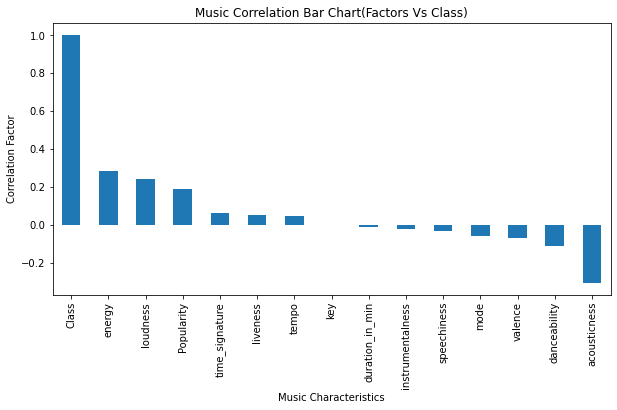

In [391]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['Class'].sort_values(ascending = False).plot(kind = 'bar');
plt.title('Music Correlation Bar Chart(Factors Vs Class)')
plt.xlabel('Music Characteristics')
plt.ylabel('Correlation Factor')
plt.show()

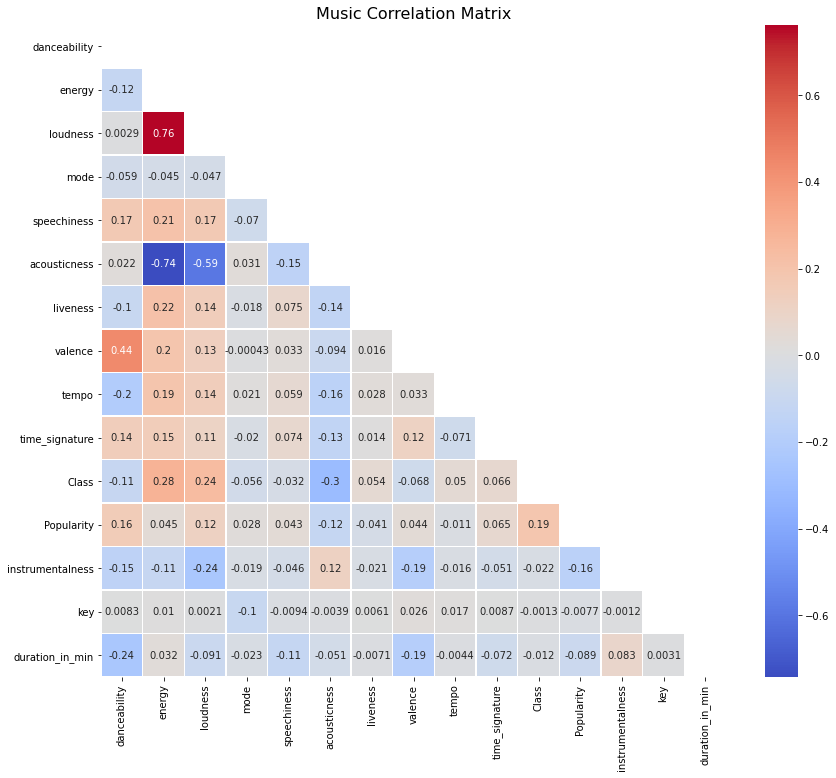

In [392]:
#data_df_corr = data_df.corr()
#data_df_corr.style.background_gradient(cmap = 'coolwarm').set_precision(2)
import numpy as np
rs = np.random.RandomState(33)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df.corr(), dtype=bool))

plt.figure(figsize=(14,12)) 
plt.title('Music Correlation Matrix', fontsize = 16)
p=sns.heatmap(df.corr(), linewidth = 0.5, annot=True, cmap='coolwarm',mask=mask) 



<h4>Insights:</h4>
<b>Correlation between music characteristics and class</b><br>
Overall correlation between the 13 variables and the Class is not very strong.
However, I have identified four variables which had significant correlation with the Class<br>
1. Acousticness Vs Class(-0.3) <br>
2. Energy Vs Class(0.28)<br>
3. Loudness Vs Class(0.24)<br>

<b>Correlation among music characteristics </b><br>
High Correlation exist among these music characteristics
1. Loudness Vs Energy(0.76)
2. Acousticness Vs Energy (-0.74)
3. Acousticness Vs Loudness(-0.59)


<a id="33"><h3>3.3 Class Analysis</h3></a>
Next, I will be analysing the class of the music to get a better understanding of it.

### Distribution and Porportion of class 

In [393]:
class_count= df.Class.value_counts()
class_count

10    3800
9     2125
6     1654
8     1524
2     1065
5     1062
0      592
1      543
4      380
7      378
3      361
Name: Class, dtype: int64

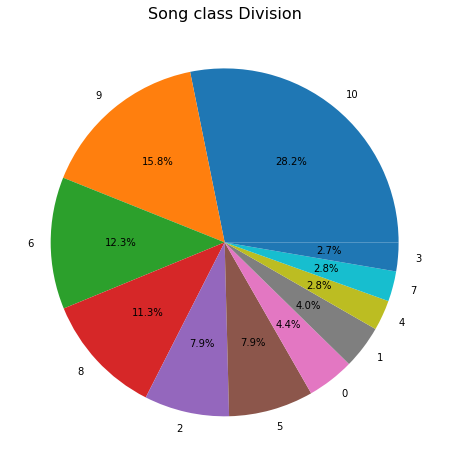

In [394]:
plt.figure(figsize=(10,8)) 
plt.title("Song class Division",fontsize=16)
plt.pie(class_count, labels = class_count.index, autopct='%1.1f%%');

C:\Users\JiaYi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Count')

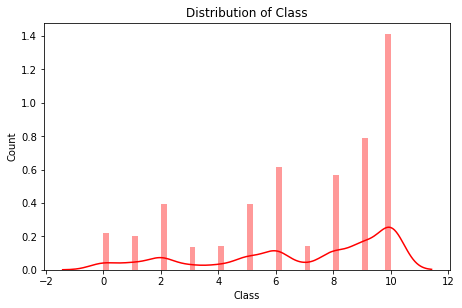

In [395]:
figure = plt.figure(figsize=(16,10))

# Distribution of Volatile acidity
ax1 = figure.add_subplot(2, 2, 1)
sns.distplot(df['Class'],
             norm_hist=False,
             bins=50,
             color='red',
             ax=ax1).set_title('Distribution of Class')
ax1.set_ylabel("Count")

<h6>Insights:</h6>
As we can see from the above pie chart, Class 10 stands the highest percentage of 28.2% followed by class 9 then 6. The classes with the lower data examples are classes 4,3,7,0. They have around 2% to 4% of data examples which is around 360 to 540. 

There is uneven distribution between 11 classes where Class 10 hits the highest percentage of 28.2%. There are many minority classes such as class 7,3,4,0 where their population is less than 5%. Hence, during modelling stage, I will be balancing the data.


<a id="35"><h3>3.4 Further Analysis of Music Charateristics and Class</h3></a>

<h3>3.4.1 Median music characteristic across all classes</h3>

In [396]:
def plot_genre_horizontal_bar(col, title=None):
    data = df.groupby('Class')[col].median().sort_values()

    cmap = plt.cm.coolwarm_r
    norm = plt.Normalize(vmin=data.min(), vmax=data.max())
    colors = [cmap(norm(value)) for value in data]

    data.plot.barh(color=colors)
    plt.xlabel(col)
    plt.title(title, fontdict={'size': 13})
    plt.show()

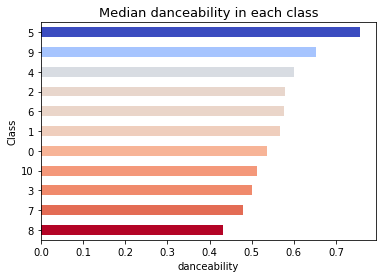

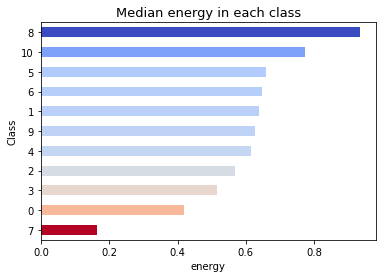

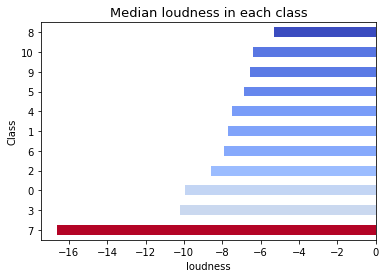

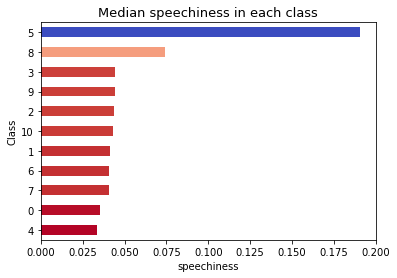

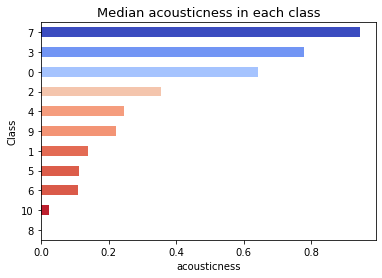

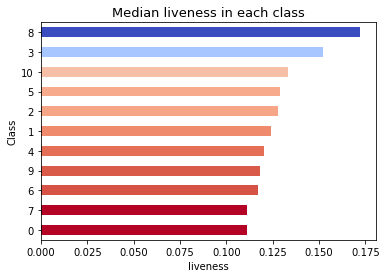

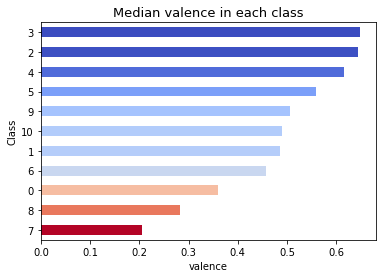

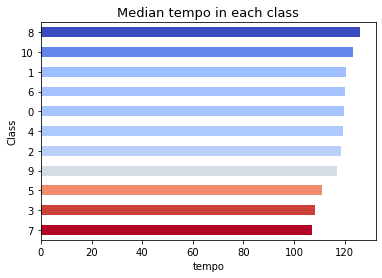

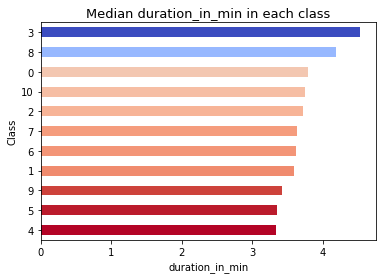

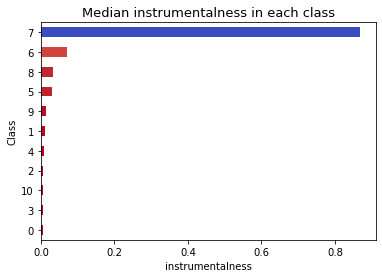

In [422]:
labels =["danceability","energy","loudness","speechiness","acousticness","liveness","valence","tempo","duration_in_min","instrumentalness"]
for i in range(len(labels)):
    plot_genre_horizontal_bar(labels[i],title="Median "+labels[i]+" in each class")


<h4>Insights on music characteristics across different music genres/classes:</h4>

Class with highest danceability:<b>Class 5</b>

Class with highest energy:<b>Class 8</b>
    
Class with highest volume(loudness):<b>Class 8</b>

Class with highest speechiness:<b>Class 5</b>

Class with highest acousticness:<b>Class 7</b>

Class with highest liveness:<b>Class 8</b>

Class with highest valence:<b>Class 3</b>

Class with highest tempo:<b>Class 8</b>

Class with highest duration:<b>Class 3</b>

Class with highest instrumentalness:<b>Class 7</b>

<h4>Further Interesting Insights:</h4>
1. Songs of class 8 have the highest value for most music characteristics.<br>
2. For instrumentalness in each class, all classes except for class 7 have near to 0.0 instrumentalness. <br>

<h3>3.4.2 Deeper Dive into Analysis between music characteristic and class</h3>

In this section, we will only focus on the 3 most significant variables(Acousticness,Energy and Loudness ) as mentioned in the correlation
matrix above. I will dive deeper to analyse the relationship between each of the 3 factors and the Class to produce some insights from it. 

### 3.4.2.1 Acousticness Vs Class

C:\Users\JiaYi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Correlation of acousticness and Class')

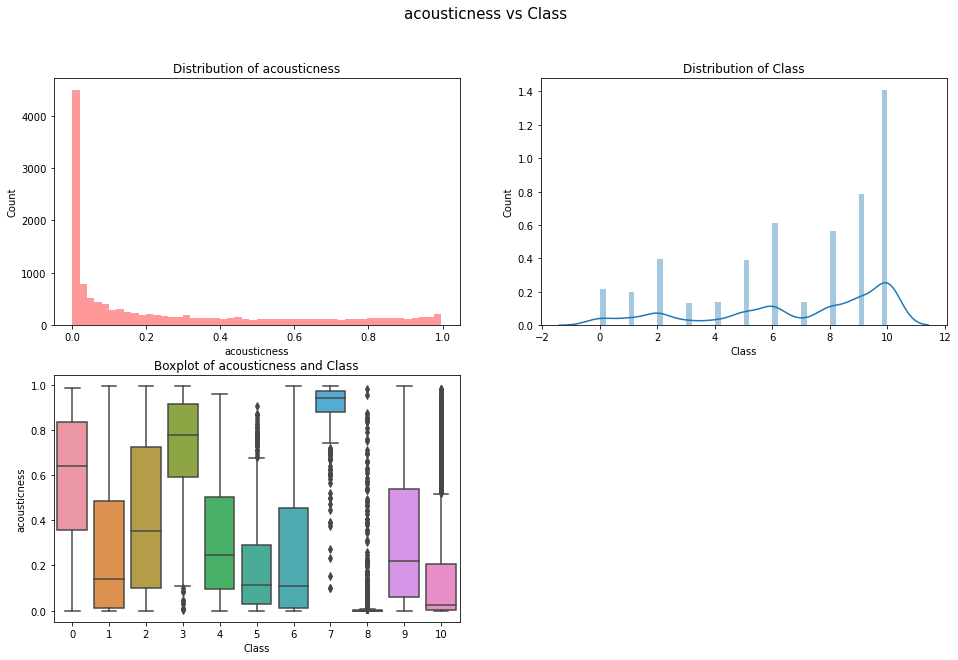

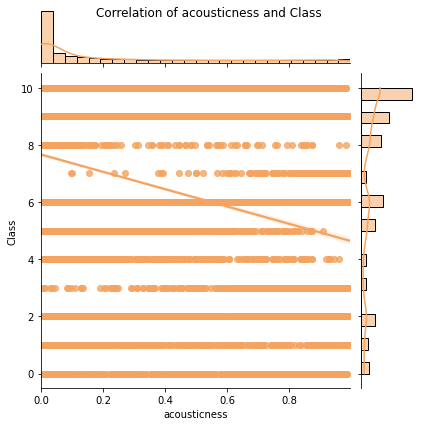

In [426]:
figure = plt.figure(figsize=(16,10)) 
# Distribution of acousticness 
ax1 = figure.add_subplot(2, 2, 1) 
sns.distplot(df['acousticness'], kde=False, norm_hist=False, bins=50, color='red', ax=ax1).set_title('Distribution of acousticness') 
ax1.set_ylabel("Count") 
# Distribution of Class 
ax2 = figure.add_subplot(2, 2, 2) 
sns.distplot(df['Class'], bins=50, ax=ax2).set_title('Distribution of Class') 
ax2.set_ylabel("Count") 
# Boxplot 
ax3 = figure.add_subplot(2, 2, 3) 
sns.boxplot(data = df, x = 'Class', y = 'acousticness',ax=ax3).set_title("Boxplot of acousticness and Class")
plt.suptitle("acousticness vs Class", fontsize=15) 
# Correlation of acousticness and Class 
sns.jointplot(x = "acousticness", y = "Class", kind = "reg", data = df, dropna = True,color='sandybrown') 
plt.suptitle("Correlation of acousticness and Class") 




<h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">Insights</h3><br>
a) <u><b>Distribution Chart of acousticness:</b></u><br>
The distribution chart of acousticness is right-skewed which means that the quantity of acousticness is quite less in this dataset.
The quantity of acousticness ranges between 0.0 to 1.0 g/dm^3 where the distribution mainly clusters around 0.0 to 0.2. 

b) <u><b>Distribution Chart of class:</b></u><br>
We can see that the chart is left-skewed where most of the class is class 10.

c) <u><b>Boxplot for acousticness:</b></u><br>
From the boxplot, we can see that  Classes  0,3,7 has a higher value of accousticness where the median value of acousticness is above 0.6. Whereas for classes 1，2，4，5，6，8，9 and 10, song in this class have a lower value of accoustiness where median value is bove 0.4.

d) <u><b>Joint Plot for acousticness and class:</b></u><br>
We have combined the two distribution charts together to see their relationship. We learned that there is an negative relationship between acousticness and class as the orange line shows a negative linear graph. This evidences the results from the boxplot where the increase in acousticness results in an decrease in class number.
The graph is quite steeped up which shows that the relationship between acousticness and class is quite strong.

### 3.4.2.2 Energy Vs Class

C:\Users\JiaYi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Correlation of energy and Class')

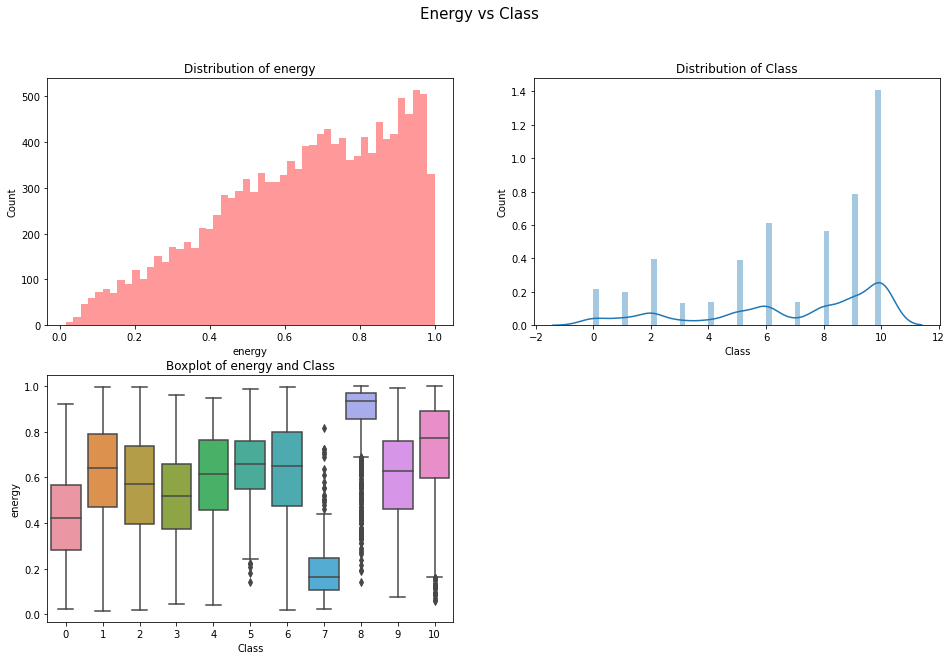

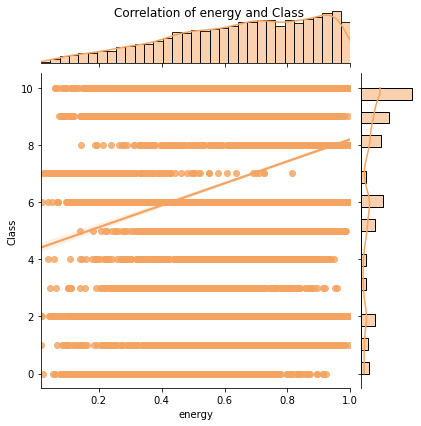

In [417]:
figure = plt.figure(figsize=(16,10)) 
# Distribution of energy 
ax1 = figure.add_subplot(2, 2, 1) 
sns.distplot(df['energy'], kde=False, norm_hist=False, bins=50, color='red', ax=ax1).set_title('Distribution of energy') 
ax1.set_ylabel("Count") 
# Distribution of Class 
ax2 = figure.add_subplot(2, 2, 2) 
sns.distplot(df['Class'], bins=50, ax=ax2).set_title('Distribution of Class') 
ax2.set_ylabel("Count") 
# Boxplot 
ax3 = figure.add_subplot(2, 2, 3) 
sns.boxplot(data = df, x = 'Class', y = 'energy',ax=ax3).set_title("Boxplot of energy and Class")
plt.suptitle("Energy vs Class", fontsize=15) 
# Correlation of energy and Class 
sns.jointplot(x = "energy", y = "Class", kind = "reg", data = df, dropna = True,color='sandybrown') 
plt.suptitle("Correlation of energy and Class") 




<h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">Insights</h3><br>
a) <u><b>Distribution Chart of Energy:</b></u><br>
The distribution chart of energy is very left-skewed which means that the quantity of energy is quite alot in this dataset.
The quantity of energy ranges between 0.0 to 1.0 where the distribution is higher when value of energy increases

b) <u><b>Distribution Chart of class:</b></u><br>
We can see that the chart is left-skewed where most of the class is class 10.

c) <u><b>Boxplot for energy:</b></u><br>
From the boxplot, we can see that for most classes, their energy level is quite high for most classes the median value of energy is 0.5 and above. For Class 7, the energy level is very low as compared to other Classes with the median value of energy at 0.1~.

d) <u><b>Joint Plot for energy and class:</b></u><br>
We have combined the two distribution charts together to see their relationship. We learned that there is an positive relationship between energy and class as the orange line shows a positive linear graph. This evidences the results from the boxplot where the increase in energy results in an increase in class number.
The graph is quite steeped up which shows that the relationship between energy and class is quite strong.

### 3.4.2.3 Loudness Vs Class

C:\Users\JiaYi\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0.98, 'Correlation of loudness and Class')

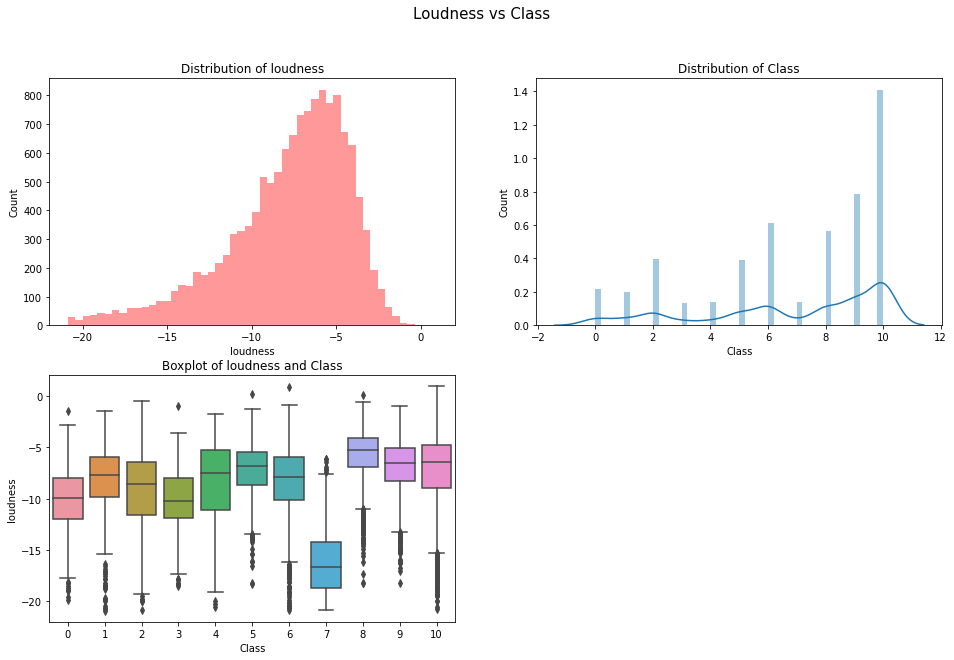

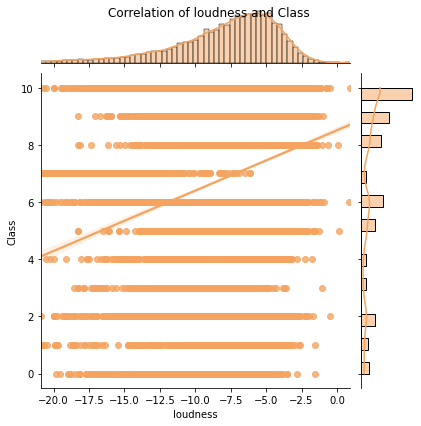

In [418]:
figure = plt.figure(figsize=(16,10)) 
# Distribution of loudness 
ax1 = figure.add_subplot(2, 2, 1) 
sns.distplot(df['loudness'], kde=False, norm_hist=False, bins=50, color='red', ax=ax1).set_title('Distribution of loudness') 
ax1.set_ylabel("Count") 
# Distribution of Class 
ax2 = figure.add_subplot(2, 2, 2) 
sns.distplot(df['Class'], bins=50, ax=ax2).set_title('Distribution of Class') 
ax2.set_ylabel("Count") 
# Boxplot 
ax3 = figure.add_subplot(2, 2, 3) 
sns.boxplot(data = df, x = 'Class', y = 'loudness',ax=ax3).set_title("Boxplot of loudness and Class")
plt.suptitle("Loudness vs Class", fontsize=15) 
# Correlation of loudness and Class 
sns.jointplot(x = "loudness", y = "Class", kind = "reg", data = df, dropna = True,color='sandybrown') 
plt.suptitle("Correlation of loudness and Class") 




<h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;">Insights</h3><br>
a) <u><b>Distribution Chart of loudness:</b></u><br>
The distribution chart of loudness is very left-skewed which means that the quantity of loudness is quite alot in this dataset.
The quantity of loudness is higher when value is higher (around -10 to -5）。

b) <u><b>Distribution Chart of class:</b></u><br>
We can see that the chart is left-skewed where most of the class is class 10.

c) <u><b>Boxplot for loudness:</b></u><br>
From the boxplot, we can see that for most classes, their loudness level is quite high for most classes the median value of loudness is -10 and above. For Class 7, the loudness level is very low as compared to other Classes with the median value of loudness at -17~.

d) <u><b>Joint Plot for loudness and class:</b></u><br>
We have combined the two distribution charts together to see their relationship. We learned that there is an positive relationship between loudness and class as the orange line shows a positive linear graph. This evidences the results from the boxplot where the increase in loudness results in an increase in class number.
The graph is quite steeped up which shows that the relationship between loudness and class is quite strong.




<a id='7'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">4. Modelling, Evaluation and Prediction</h2>

### <a id="8">4.1 Preparing Data for modelling</a>

Let us first drop columns that are not definitely not involved in the prediction of class. 

In [22]:
df_modelling=df.drop(['Artist Name',"Track Name","Popularity"],axis=1)

In [23]:
df_modelling

,danceability,energy,loudness,mode,speechiness,acousticness,liveness,valence,tempo,time_signature,Class,instrumentalness,key,duration_in_min
0,0.854,0.564,-4.964,1,0.0485,0.017100,0.0849,0.8990,134.071,4,5,0.251237,1.0,3.909933
1,0.382,0.814,-7.230,1,0.0406,0.001100,0.1010,0.5690,116.454,4,10,0.004010,3.0,4.195550
2,0.434,0.614,-8.334,1,0.0525,0.486000,0.3940,0.7870,147.681,4,6,0.000196,6.0,1.827783
3,0.853,0.597,-6.528,0,0.0555,0.021200,0.1220,0.5690,107.033,4,5,0.057497,10.0,2.899467
4,0.167,0.975,-4.279,1,0.2160,0.000169,0.1720,0.0918,199.060,4,10,0.016100,2.0,3.832667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13479,0.166,0.109,-17.100,0,0.0413,0.993000,0.0984,0.1770,171.587,3,6,0.824000,7.0,3.224167
13480,0.638,0.223,-10.174,0,0.0329,0.858000,0.0705,0.3350,73.016,4,2,0.000016,11.0,4.284450
13481,0.558,0.981,-4.683,0,0.0712,0.000030,0.6660,0.2620,105.000,4,8,0.000136,4.0,3.603700
13482,0.215,0.805,-12.757,0,0.1340,0.001290,0.2560,0.3550,131.363,4,8,0.916000,6.0,3.661550


### Split Input Features and Label

In [24]:
X=df_modelling[["danceability","energy","mode","loudness","acousticness","speechiness","liveness","valence","tempo","duration_in_min","time_signature","instrumentalness","key"]]
y=df_modelling[["Class"]]

In [25]:
print(X.shape)
print(y.shape)

(13484, 13)
(13484, 1)


### Data Balancing

In [26]:

#Enter your codes here
y.Class.value_counts()

10    3800
9     2125
6     1654
8     1524
2     1065
5     1062
0      592
1      543
4      380
7      378
3      361
Name: Class, dtype: int64

In [27]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

In [28]:
#Enter your codes here
y.Class.value_counts()

0     3800
1     3800
2     3800
3     3800
4     3800
5     3800
6     3800
7     3800
8     3800
9     3800
10    3800
Name: Class, dtype: int64

### Feature Scaling

Noticed that I only feature scaled non-categorical variable. For encoded categorical variable such as "mode","time_signature" and "key", I did not scaled it beacuase it is already encoded. (Eg Key=B# is 9)

In [29]:
scaler = preprocessing.MinMaxScaler()
X[['danceability', 'energy', 'loudness', 'acousticness',
       'speechiness', 'liveness', 'valence', 'tempo', 'duration_in_min', 'instrumentalness']]=scaler.fit_transform(X[['danceability', 'energy', 'loudness', 'acousticness',
       'speechiness', 'liveness', 'valence', 'tempo', 'duration_in_min', 'instrumentalness']])                                                                                                                      

### Feature Selection

**Refer to section under Decision Tree Model**

Note that for feature selection, I will be carrying it out in my first model(Decision Tree) as I will be able to compare the results before and after selecting the features needed to increase model performances. I would need to develop a model first to carry out this process 

### Train test and split

In [30]:
#Enter your codes to split the data into X_train, y_train, X_test and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

### <a id='9'>4.2 Modelling</a>

From our analysis above, we now have a better understanding on the relationship between each music's characteristics and classes.

As our objective is to  better understand what factors affect the class(type of music), we will need to use classification model.<br>
There are many types of classification model:<br>
1. [Decision Tree Classifier](#10)
2. [K-Neighbors Classifier](#11)
3. [Random Forest Classifier](#12)
4. [Gradient Boosting Classifier](#13)
5. [XGBoost Classifier](#14)
6. [Multinomial Nayes Bayes](#15)
7. [Stochastic Gradient Descent(SGD) Classifier](#16)
8. [One-Vs-Rest Classifier](#17)
9. [Neural Network](#18)
10. <i>Logistic Regression (only for binary class classification)</i>
11. <i>Support vector Machine (only for binary class classification)</i>

    
However, I will be ommiting <b>Logistic Regression and SVM</b> as both can only are more suitable for binary classification but in this case we have 11 classes.


<b>How will I be going through this process?</b>
1. Try out each model
2. Fine tune parameters to give the BEST results for each model
3. Compare the best results of each model(produce a table)
4. Derive the model that gives the BEST results out of all models

<b>Metrics:</b><br>
<b>Why I use cross validation?</b><br>
I will be using cross validation rather than classfication report of precision, recall, f1-score and accuracy, as it allows a better representation assesment of the model performance as it test each and every portion of the dataset for each model. This is because our dataset.  Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

<b>What area of metric will I be focusing on?</b><br>
However, I will be <b>focusing more on precision</b> in this project. This is becuase we are not targeting on health related classification or prediction where false negatives are important. In this case, more false negatives is not as costly. Hence, we be focusing on false positive, preciseness of ouor classification.

<a id='10'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 1: Decision tree</h3>

## A: Building Model -  Decision Tree

In [31]:
#Enter your codes here to train a DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [32]:
#Enter your codes to print out the depth of the treeI will be generating the classification report for each model which has precision, recall, f1-score to help me evaluate the model's performance. However, I will be focusing more on precision in this project. This is becuase we are not targeting on health related classification or prediction where false negatives are important. In this case, more false negatives is not as costly. Hence, we be focusing on false positive, preciseness of ouor classification.

tr.get_depth()

34

## B: Model Evaluation

We can see that results for <b>classification report performance is lower than from our cross validation performance</b>. Thus, in the next few models, <b>I will be using cross validation </b>as it allows me to test and train every portion of the dataset. Also, given that the dataset is small, it is better to get a good representative of each portion of our dataset to get a good and reliable test result.

### Classification

In [33]:
from sklearn.metrics import classification_report
y_pred = tr.predict(X_test)
print(y_pred)
print(classification_report(y_test,y_pred))

[9 6 6 ... 3 7 1]
              precision    recall  f1-score   support

           0       0.64      0.68      0.66       760
           1       0.56      0.57      0.57       760
           2       0.55      0.52      0.53       760
           3       0.83      0.82      0.82       760
           4       0.75      0.78      0.77       760
           5       0.73      0.76      0.74       760
           6       0.42      0.39      0.40       760
           7       0.90      0.92      0.91       760
           8       0.73      0.73      0.73       760
           9       0.44      0.44      0.44       760
          10       0.31      0.31      0.31       760

    accuracy                           0.63      8360
   macro avg       0.62      0.63      0.63      8360
weighted avg       0.62      0.63      0.63      8360



### Cross Validation

In [34]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(tr, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))


Average Accuracy: 0.6447868388605228
Average Precision: 0.640549121484521
Average Recall: 0.6447854091317843
Average F1: 0.641730492680019


<a id='100'><h3 style="padding:5px;color:white;background-color:lightsalmon;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="white">Feature Selection</h3>

I will be using mlxtend.feature_selection to do <b>forward featuure selection</b> to find the best subset of features that gives highest precision.

In [260]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfsl=SFS(tr,k_features=13,forward=True,scoring="precision_macro",cv=10)
sfsl.fit(X,y)
sfsl.subsets_

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

{1: {'feature_idx': (1,),
  'cv_scores': array([0.21350597, 0.2416838 , 0.22786318, 0.23265048, 0.24716546,
         0.24592788, 0.26500939, 0.25876495, 0.25044251, 0.26094909]),
  'avg_score': 0.2443962708445419,
  'feature_names': ('energy',)},
 2: {'feature_idx': (1, 8),
  'cv_scores': array([0.35639901, 0.33409008, 0.33579637, 0.33935256, 0.35831938,
         0.34739992, 0.33877922, 0.34555062, 0.34992518, 0.34929878]),
  'avg_score': 0.34549111213820444,
  'feature_names': ('energy', 'tempo')},
 3: {'feature_idx': (1, 8, 12),
  'cv_scores': array([0.43915131, 0.44531198, 0.45520738, 0.47340775, 0.46520821,
         0.47468086, 0.47169543, 0.46573106, 0.47843419, 0.48986071]),
  'avg_score': 0.46586888810354143,
  'feature_names': ('energy', 'tempo', 'key')},
 4: {'feature_idx': (1, 3, 8, 12),
  'cv_scores': array([0.51939245, 0.51118539, 0.5158219 , 0.51937717, 0.52980186,
         0.53289051, 0.53897941, 0.53685228, 0.55243178, 0.54740715]),
  'avg_score': 0.530413989685006,
  'f

<h6>Insights:</h6>
Looking at the results, <b>subset 12</b> which contains 'danceability',
   'energy',
   'loudness',
   'acousticness',
   'speechiness',
   'valence',
   'tempo',
   'duration_in_min',
   'time_signature',
   'instrumentalness',
   'key'<b>gives highest precision of 0.6339</b>. Hence we will be using this subset of features to built a new decision tree model and do cross validation to find out the performance of the model.

In [35]:
X=df_modelling[['danceability',
   'energy',
   'loudness',
   'acousticness',
   'speechiness',
   'valence',
   'tempo',
   'duration_in_min',
   'time_signature',
   'instrumentalness',
   'key']]
y=df_modelling[["Class"]]

from imblearn.over_sampling import SMOTE
smote=SMOTE()
X,y=smote.fit_resample(X,y)

scaler = preprocessing.MinMaxScaler()
X[['danceability', 'energy', 'loudness', 'acousticness',
       'speechiness', 'valence', 'tempo', 'duration_in_min', 'instrumentalness']]=scaler.fit_transform(X[['danceability', 'energy', 'loudness', 'acousticness',
       'speechiness', 'valence', 'tempo', 'duration_in_min', 'instrumentalness']])                                                                                                                      
#Enter your codes to split the data into X_train, y_train, X_test and y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

tr = DecisionTreeClassifier(random_state=42)
tr.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [262]:

result = cross_validate(tr,X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.639762482555988
Average Precision: 0.6361851740258518
Average Recall: 0.6397611166237712
Average F1: 0.6370620010225501


<h6>Insights:</h6>
Looks like the results have improved slightly after using subset 12 of features. It increase from 0.645 to 0.636 for the precision metric.<br>
<h4> Hence, we will be using this subset of features consisting of 'danceability',
   'energy',
   'loudness',
   'acousticness',
   'speechiness',
   'valence',
   'tempo',
   'duration_in_min',
   'time_signature',
   'instrumentalness',
   'key' for the rest of our models. </h4>



## C: Tuning Parameters

<b>How will I be tuning the parameters?</b><br>
** Hyer-parameter tuning: Use Grid SearchCV to find the best combination of parameters that gives highest precision

### Hyper-parameter tuning 

Now, we will be trying the Grid SearchCV method.

In [57]:
tr = DecisionTreeClassifier(random_state=42)

In [53]:
from sklearn.model_selection import GridSearchCV

In [59]:
params = {
    'max_depth':list(range(1,50)),
     "min_samples_split":list(range(1,10)),
    "min_samples_leaf":list(range(1,10)),
    'criterion': ["gini", "entropy"]
}

In [60]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=tr, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision_macro")


In [61]:
%%time

with tf.device('/GPU:0'):
    grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 7938 candidates, totalling 31752 fits


C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.06636748 0.06636748 ... 0.5313526  0.5313526  0.5313526 ]
  warnings.warn(


Wall time: 25min 43s


In [62]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.035261,0.002165,0.000000,0.000000,gini,1,1,1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,7938
1,0.070515,0.002872,0.013753,0.001299,gini,1,1,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.061481,0.066313,0.069185,0.068491,0.066367,0.003014,6913
2,0.069015,0.001732,0.014004,0.001871,gini,1,1,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.061481,0.066313,0.069185,0.068491,0.066367,0.003014,6913
3,0.050762,0.001299,0.028757,0.005403,gini,1,1,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.061481,0.066313,0.069185,0.068491,0.066367,0.003014,6913
4,0.062513,0.005410,0.013505,0.001119,gini,1,1,5,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.061481,0.066313,0.069185,0.068491,0.066367,0.003014,6913


In [63]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
5671,1.452075,0.021758,0.009252,0.000829,entropy,22,1,2,"{'criterion': 'entropy', 'max_depth': 22, 'min...",0.589786,0.597872,0.592996,0.596382,0.594259,0.003129,1
5833,1.519718,0.059970,0.009252,0.001090,entropy,24,1,2,"{'criterion': 'entropy', 'max_depth': 24, 'min...",0.584088,0.597898,0.596668,0.596710,0.593841,0.005652,2
5590,1.457577,0.015695,0.008002,0.000001,entropy,21,1,2,"{'criterion': 'entropy', 'max_depth': 21, 'min...",0.584271,0.597949,0.596848,0.594828,0.593474,0.005430,3
5509,1.561849,0.091202,0.010002,0.001872,entropy,20,1,2,"{'criterion': 'entropy', 'max_depth': 20, 'min...",0.584497,0.593150,0.597338,0.597088,0.593018,0.005193,4
6076,1.532844,0.061208,0.010003,0.002917,entropy,27,1,2,"{'criterion': 'entropy', 'max_depth': 27, 'min...",0.584747,0.594409,0.596764,0.595211,0.592783,0.004716,5


In [64]:
tr_best=grid_search.best_estimator_
tr_best

DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)

In [263]:
tr_best=DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)

In [264]:

result = cross_validate(tr_best, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.6449539343449618
Average Precision: 0.6400327611905886
Average Recall: 0.6449605378884193
Average F1: 0.6416296859707229


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>F1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>DecisionTreeClassifier(random_state=42)</td>
        <td>0.64</td>
        <td>0.64</td>
        <td>0.64</td>
        <td>0.64</td>
    </tr>
    <tr>
        <td>Tuned Model</td>
        <td>DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)</td>
        <td>0.65</td>
        <td>0.64</td>
        <td>0.65</td>
        <td>0.64</td>
    </tr>
</table>

From this table we can see that we can use the last model which is<b> DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)</b> as it <b>gives the higher precision, accuracy, recall and f1-score

### Conclusion: Highest precision of tuned decicison tree is 64%

## E: Predictions

In [265]:
d = {'danceability': [0.473, 0.55], 'energy': [0.23, 0.33],"loudness":[-1,-9],
"acousticness":[0.33,0.01],"speechiness":[0.02,0.1],"valence":[0.32,0.90],"tempo":[0.10,0.90],
"duration_in_min":[7,9],"time_signature":[3,4],"instrumentalness":[0.23,0.78],"key":[3,4]}
df = pd.DataFrame(data=d)
tr_best.fit(X_train,y_train)
df['class']=tr_best.predict(df)
display(df)

,danceability,energy,loudness,acousticness,speechiness,valence,tempo,duration_in_min,time_signature,instrumentalness,key,class
0,0.473,0.23,-1,0.33,0.02,0.32,0.1,7,3,0.23,3,0
1,0.550,0.33,-9,0.01,0.10,0.90,0.9,9,4,0.78,4,4


<a id='11'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 2: K-Neighbors Classifier</h3>

## A: Building Model -  K-Neighbors Classifier

In [266]:
from sklearn.neighbors import KNeighborsClassifier as KNC

classifier = KNC()
classifier.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

## B: Model Evaluation

### Cross Validation

In [267]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(classifier, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.6529678100578484
Average Precision: 0.6446341092518711
Average Recall: 0.6529785807311853
Average F1: 0.6346146245080541


## C: Tuning Parameters

In [49]:
from sklearn.model_selection import GridSearchCV
knn_2 = KNC()
params = {
    'leaf_size': list(range(1,50)),
    'n_neighbors': list(range(1,100)),
    'p': [1,2]
}

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=knn_2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision_macro")

In [50]:

%%time

#with tf.device('/GPU:0'):
grid_search.fit(X_train, y_train)

score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

Fitting 4 folds for each of 9702 candidates, totalling 38808 fits


C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Wall time: 10h 35min 31s


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.932252,0.252040,3.303913,0.104637,1,1,1,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 1}",0.766863,0.777561,0.769614,0.778194,0.773058,0.004922,45
1,0.882536,0.086670,3.180631,0.155629,1,1,2,"{'leaf_size': 1, 'n_neighbors': 1, 'p': 2}",0.749810,0.752977,0.749671,0.761857,0.753579,0.004959,88
2,1.274602,0.109488,5.133861,0.138603,1,2,1,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 1}",0.725704,0.722294,0.722202,0.731138,0.725334,0.003636,145
3,1.020289,0.130202,4.819467,0.172410,1,2,2,"{'leaf_size': 1, 'n_neighbors': 2, 'p': 2}",0.702868,0.708004,0.692397,0.714996,0.704566,0.008240,216
4,0.675785,0.033167,6.085378,0.270490,1,3,1,"{'leaf_size': 1, 'n_neighbors': 3, 'p': 1}",0.703114,0.701149,0.703853,0.720392,0.707127,0.007722,151


In [51]:
score_df.nlargest(5,"mean_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_leaf_size,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
4752,0.377834,0.026230,3.190966,1.193384,25,1,1,"{'leaf_size': 25, 'n_neighbors': 1, 'p': 1}",0.767001,0.777561,0.769614,0.778329,0.773126,0.004914,1
4950,0.363832,0.024206,3.941885,0.775656,26,1,1,"{'leaf_size': 26, 'n_neighbors': 1, 'p': 1}",0.767001,0.777561,0.769614,0.778329,0.773126,0.004914,1
5148,0.374084,0.034352,3.822608,1.110617,27,1,1,"{'leaf_size': 27, 'n_neighbors': 1, 'p': 1}",0.767001,0.777561,0.769614,0.778329,0.773126,0.004914,1
5346,0.361831,0.011391,4.169937,1.155537,28,1,1,"{'leaf_size': 28, 'n_neighbors': 1, 'p': 1}",0.767001,0.777561,0.769614,0.778329,0.773126,0.004914,1
5544,0.354579,0.019050,4.664179,1.132935,29,1,1,"{'leaf_size': 29, 'n_neighbors': 1, 'p': 1}",0.767001,0.777561,0.769614,0.778329,0.773126,0.004914,1


In [52]:
knc_best=grid_search.best_estimator_
knc_best


KNeighborsClassifier(leaf_size=25, n_neighbors=1, p=1)

In [268]:
knc_best=KNC(leaf_size=25, n_neighbors=1, p=1)

In [269]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(knc_best, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.7947866385158336
Average Precision: 0.7880893693831723
Average Recall: 0.7947811630522723
Average F1: 0.7864581015088197


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>KNeighborsClassifier()</td>
        <td>0.65</td>
        <td>0.64</td>
        <td>0.65</td>
        <td>0.63</td>
    </tr>
    <tr>
        <td>Grid search CV</td>
        <td>KNeighborsClassifier(leaf_size=25, n_neighbors=1, p=1)</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
    </tr>
</table>

### Conclusion: Highest precision of tuned k-neighbors classifier is 79%.

## E: Predictions

In [293]:
d = {'danceability': [0.473, 0.55], 'energy': [0.23, 0.33],"loudness":[-1,-9],
"acousticness":[0.33,0.01],"speechiness":[0.02,0.1],"valence":[0.32,0.90],"tempo":[0.10,0.90],
"duration_in_min":[7,9],"time_signature":[3,4],"instrumentalness":[0.23,0.78],"key":[3,4]}
df = pd.DataFrame(data=d)
knc_best.fit(X_train,y_train)
df['class']=knc_best.predict(df)
display(df)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


,danceability,energy,loudness,acousticness,speechiness,valence,tempo,duration_in_min,time_signature,instrumentalness,key,class
0,0.473,0.23,-1,0.33,0.02,0.32,0.1,7,3,0.23,3,3
1,0.550,0.33,-9,0.01,0.10,0.90,0.9,9,4,0.78,4,1


<a id='12'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 3: Random Forest Classifier</h3>

## A: Building Model -  Random Forest Classifier

In [271]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)

<ipython-input-271-8594d7246451>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC.fit(X_train, y_train)


RandomForestClassifier()

## B: Model Evaluation

### Cross Validation

In [272]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(RFC, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.7978252904557233
Average Precision: 0.79187426913976
Average Recall: 0.7978170218104016
Average F1: 0.788701617264592


## C: Tuning Parameters

In [62]:

with tf.device('/GPU:0'):
    from sklearn.model_selection import RepeatedStratifiedKFold
    RFC2 = RandomForestClassifier()
    n_estimators = [10, 100, 1000]
    max_features = ['sqrt', 'log2']
    # define grid search
    grid = dict(n_estimators=n_estimators,max_features=max_features)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    grid_search = GridSearchCV(estimator=RFC2, param_grid=grid, n_jobs=-1, cv=cv, scoring='precision_macro',error_score=0)
    grid_result = grid_search.fit(X, y)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [63]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.795515 using {'max_features': 'sqrt', 'n_estimators': 1000}


In [64]:
RFC_best = RandomForestClassifier(max_features='sqrt',n_estimators=1000)
RFC_best

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [273]:
RFC_best=RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [274]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(RFC_best, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.8050500324798812
Average Precision: 0.8004426710191744
Average Recall: 0.8050405544639864
Average F1: 0.7963544425675914


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>RandomForestClassifier()</td>
        <td>0.80</td>
        <td>0.79</td>
        <td>0.80</td>
        <td>0.79</td>
    </tr>
    <tr>
        <td>Grid search CV</td>
        <td>RandomForestClassifier(max_features='sqrt', n_estimators=1000)</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>0.80</td>
    </tr>
</table>

### Conclusion: Highest precision of tuned Random Forest classifier is 80%

## E: Predictions

In [294]:
d = {'danceability': [0.473, 0.55], 'energy': [0.23, 0.33],"loudness":[-1,-9],
"acousticness":[0.33,0.01],"speechiness":[0.02,0.1],"valence":[0.32,0.90],"tempo":[0.10,0.90],
"duration_in_min":[7,9],"time_signature":[3,4],"instrumentalness":[0.23,0.78],"key":[3,4]}
df = pd.DataFrame(data=d)
RFC_best.fit(X_train,y_train)
df['class']=RFC_best.predict(df)
display(df)

<ipython-input-294-345b35654605>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFC_best.fit(X_train,y_train)


,danceability,energy,loudness,acousticness,speechiness,valence,tempo,duration_in_min,time_signature,instrumentalness,key,class
0,0.473,0.23,-1,0.33,0.02,0.32,0.1,7,3,0.23,3,2
1,0.550,0.33,-9,0.01,0.10,0.90,0.9,9,4,0.78,4,2


<a id='13'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 4: XGBoost Classifier</h3>

## A: Building Model -  XGBoost Classifier

In [276]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[10:33:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

## B: Model Evaluation

### Cross Validation

In [277]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(xgb, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:33:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:34:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:35:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy: 0.7339262814887758
Average Precision: 0.7332907976461368
Average Recall: 0.7339384554559832
Average F1: 0.7269116476683986


## C: Tuning Parameters

In [51]:
params={"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }

In [54]:

xgb_2 = XGBClassifier()
xgb_2.fit(X_train, y_train)
grid_search = GridSearchCV(estimator=xgb_2, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "precision_macro")


[08:40:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
%%time
with tf.device('/GPU:0'):
    grid_search.fit(X_train, y_train)

    score_df = pd.DataFrame(grid_search.cv_results_)
    score_df.head()


Fitting 4 folds for each of 3840 candidates, totalling 15360 fits


In [ ]:
score_df.nlargest(5,"mean_test_score")


In [ ]:
xgb_best=grid_search.best_estimator_
xgb_best


In [278]:
from xgboost import XGBClassifier
xgb_best=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False, gamma=0.0, gpu_id=-1, importance_type=None, interaction_constraints='', learning_rate=0.2, max_delta_step=0, max_depth=15, min_child_weight=1, missing=np.nan, monotone_constraints='()', n_estimators=100, n_jobs=16, num_parallel_tree=1, objective='multi:softprob', predictor='auto', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1, tree_method='exact', validate_parameters=1, verbosity=None)

In [279]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(xgb_best, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:37:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:38:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:39:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:40:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:41:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[10:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Average Accuracy: 0.8123956063928868
Average Precision: 0.8122806728460841
Average Recall: 0.8123934075475209
Average F1: 0.8075725628072515


## D: Model Insights

<b>After much tuning, let's view the summary of model results:</b>

<table>
    <thead>
        <td>Tuning Methods</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Original Model (No Parameters)</td>
        <td>XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
        <td>0.73</td>
    </tr>
    <tr>
        <td>Grid search CV</td>
        <td>XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)</td>
        <td>0.81</td>
        <td>0.81</td>
        <td>0.81</td>
        <td>0.81</td>
    </tr>
</table>

### Conclusion: Highest precision of tuned XGBoost Classifier is 81%.

## E: Predictions

In [295]:
d = {'danceability': [0.473, 0.55], 'energy': [0.23, 0.33],"loudness":[-1,-9],
"acousticness":[0.33,0.01],"speechiness":[0.02,0.1],"valence":[0.32,0.90],"tempo":[0.10,0.90],
"duration_in_min":[7,9],"time_signature":[3,4],"instrumentalness":[0.23,0.78],"key":[3,4]}
df = pd.DataFrame(data=d)
xgb_best.fit(X_train,y_train)
df['class']=xgb_best.predict(df)
display(df)

C:\Users\JiaYi\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[11:24:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,danceability,energy,loudness,acousticness,speechiness,valence,tempo,duration_in_min,time_signature,instrumentalness,key,class
0,0.473,0.23,-1,0.33,0.02,0.32,0.1,7,3,0.23,3,10
1,0.550,0.33,-9,0.01,0.10,0.90,0.9,9,4,0.78,4,2


<a id='14'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 5: Gradient Boosting Classifier</h3>

## A: Building Model -  Gradient Boosting Classifier

In [280]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GradientBoostingClassifier()

## B: Model Evaluation

### Cross Validation

In [281]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(GBC, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.5865564065663692
Average Precision: 0.5756074345990829
Average Recall: 0.586559766476198
Average F1: 0.5743339638877611


<h6>Note:</h6>
I will not be tuning this classifier as the base model already has a much lower performance than the base model of other algorithms. Hence, even with tuning, it may only increase a little bit but not enough to hit the 70% range of precision/accuracy/recall.

Also, since accuracy is low, I will not be using this model to do any predictions.

### Conclusion: Highest precision of tuned Gradient Boosting Classifier is 58%.

<a id='15'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 6: MultinomialNB</h3>

## A: Building Model -  MultinomialNB

In [282]:
from sklearn.naive_bayes import MultinomialNB

MNB = MultinomialNB()
MNB.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MultinomialNB()

## B: Model Evaluation

### Cross Validation

In [283]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(MNB, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

Average Accuracy: 0.4122731396913762
Average Precision: 0.3756781065570345
Average Recall: 0.4122744116096624
Average F1: 0.377663304597036


<h6>Note:</h6>
I will not be tuning this classifier as the base model already has a much lower performance than the base model of other algorithms. Hence, even with tuning, it may only increase a little bit but not enough to hit the 70% range of precision/accuracy/recall.

Also, since accuracy is low, I will not be using this model to do any predictions.

### Conclusion: Highest precision of tuned Multinomial Naives Bayes Classifier is 38%.

<a id='16'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 7: SGD Classifier</h3>

## A: Building Model -  SGD Classifier

In [284]:
from sklearn.linear_model import SGDClassifier
SGD = SGDClassifier()
SGD.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDClassifier()

## B: Model Evaluation

### Cross Validation

In [285]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(SGD, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedM

Average Accuracy: 0.42311169921626757
Average Precision: 0.4356611694349228
Average Recall: 0.42311530449147117
Average F1: 0.36351728042316084


<h6>Note:</h6>
I will not be tuning this classifier as the base model already has a much lower performance than the base model of other algorithms. Hence, even with tuning, it may only increase a little bit but not enough to hit the 70% range of precision/accuracy/recall.

Also, since accuracy is low, I will not be using this model to do any predictions.

### Conclusion: Highest precision of tuned SGD Classifier is 44%.

<a id='17'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="darkblue">Model 8:OneVsRest Classifier</h3>

## A: Building Model -  OneVsRest Classifier

In [286]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

ORC=OneVsRestClassifier(LinearSVC(random_state=0))
ORC.fit(X_train, y_train)

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

OneVsRestClassifier(estimator=LinearSVC(random_state=0))

## B: Model Evaluation

### Cross Validation

In [287]:
#Enter your codes to use cross_validation here
from sklearn.model_selection import cross_validate

result = cross_validate(ORC, X, np.ravel(y), cv=14, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro'])
print("Average Accuracy:", np.mean(result['test_accuracy']))
print("Average Precision:", np.mean(result['test_precision_macro']))
print("Average Recall:", np.mean(result['test_recall_macro']))
print("Average F1:", np.mean(result['test_f1_macro']))

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Average Accuracy: 0.4718432689072896
Average Precision: 0.4229064059627106
Average Recall: 0.4718399478207922
Average F1: 0.41048095739272616


C:\Users\JiaYi\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


<h6>Note:</h6>
I will not be tuning this classifier as the base model already has a much lower performance than the base model of other algorithms. Hence, even with tuning, it may only increase a little bit but not enough to hit the 70% range of precision/accuracy/recall.

Also, since accuracy is low, I will not be using this model to do any predictions.

### Conclusion: Highest precision of tuned One-Vs-Rest Classifier is 42%.

<a id='18'><h3 style="padding:5px;color:white;background-color:#C4E0E5;text-align: center;margin-left:auto;margin-right:auto;border-radius:10px;"><font color="white">Model 9: Neural Network Model</h3>

## A: Preparing Data for neural network model

In [37]:
from keras.utils import np_utils

In [38]:
encoder = LabelEncoder()
encoder.fit(y_train)
encoded_Y_train = encoder.transform(y_train)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_train = np_utils.to_categorical(encoded_Y_train)
encoder = LabelEncoder()
encoder.fit(y_test)
encoded_Y_test = encoder.transform(y_test)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y_test = np_utils.to_categorical(encoded_Y_test)


In [39]:
dummy_y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## B: Building Model -  Deep Neural Network Model

In [42]:
model1 = Sequential()
model1.add(Dense(512, input_shape = (X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

model1.add(Dense(512, input_shape = (X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))

model1.add(Dense(512, input_shape = (X_train.shape[1],)))
model1.add(Activation('relu'))
model1.add(Dropout(0.1))


model1.add(Dense(11))
model1.add(Activation('softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

import keras
from keras.callbacks import EarlyStopping

# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min',
                                   patience=10, 
                                   restore_best_weights=True) # important - otherwise you just return the last weigths...

# now we just update our model fit call
history = model1.fit(X_train,
                    dummy_y_train,
                    callbacks=[es],
                    epochs=8000000, # you can set this to a big number!
                    batch_size=10,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=1)



Epoch 1/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.6515 - accuracy: 0.4154 - val_loss: 1.4877 - val_accuracy: 0.4779
Epoch 2/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.4819 - accuracy: 0.4791 - val_loss: 1.4747 - val_accuracy: 0.4827
Epoch 3/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.4448 - accuracy: 0.4893 - val_loss: 1.3965 - val_accuracy: 0.5096
Epoch 4/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.4104 - accuracy: 0.5034 - val_loss: 1.3601 - val_accuracy: 0.5163
Epoch 5/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.3835 - accuracy: 0.5119 - val_loss: 1.3456 - val_accuracy: 0.5280
Epoch 6/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.3579 - accuracy: 0.5225 - val_loss: 1.3406 - val_accuracy: 0.5254
Epoch 7/8000000
2676/2676 [==============================] - 6s 2ms/step - loss: 1.3316 - accuracy: 0.5295

In [43]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               6144      
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 activation_5 (Activation)   (None, 512)               0         
                                                                 
 dropout_4 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)              

## C: Model Evaluation

In [160]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

preds = model1.predict(X_test) # see how the model did!
print(classification_report(dummy_y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.67      0.80      0.73       760
           1       0.69      0.67      0.68       760
           2       0.64      0.63      0.64       760
           3       0.88      0.95      0.91       760
           4       0.76      0.93      0.83       760
           5       0.75      0.86      0.80       760
           6       0.59      0.38      0.46       760
           7       0.93      0.97      0.95       760
           8       0.73      0.86      0.79       760
           9       0.57      0.49      0.53       760
          10       0.46      0.31      0.37       760

    accuracy                           0.71      8360
   macro avg       0.70      0.71      0.70      8360
weighted avg       0.70      0.71      0.70      8360



In [162]:
accuracy = model1.evaluate(X_test, dummy_y_test, verbose=2)
print("Accuracy:",accuracy[1]*100)

262/262 - 0s - loss: 0.9021 - accuracy: 0.7145 - 158ms/epoch - 603us/step
Accuracy: 71.44736647605896


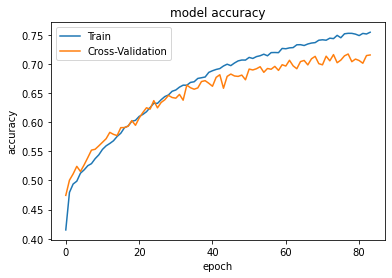

In [163]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

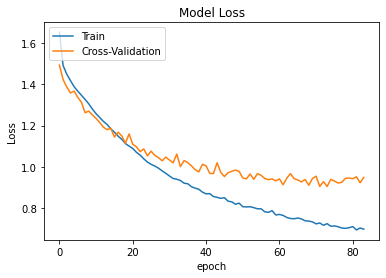

In [164]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Cross-Validation'], loc='upper left')
plt.show()

## E: Predictions

In [165]:
d = {'danceability': [0.473, 0.55], 'energy': [0.23, 0.33],"loudness":[-1,-9],
"acousticness":[0.33,0.01],"speechiness":[0.02,0.1],"valence":[0.32,0.90],"tempo":[0.10,0.90],
"duration_in_min":[7,9],"time_signature":[3,4],"instrumentalness":[0.23,0.78],"key":[3,4]}
df = pd.DataFrame(data=d)
df['class']=model1.predict(df).argmax(axis=1)
display(df)

,danceability,energy,loudness,acousticness,speechiness,valence,tempo,duration_in_min,time_signature,instrumentalness,key,class
0,0.473,0.23,-1,0.33,0.02,0.32,0.1,7,3,0.23,3,2
1,0.550,0.33,-9,0.01,0.10,0.90,0.9,9,4,0.78,4,2


### Conclusion: Highest precision of Deep Neural Network Model is 70%

<a id='5'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">5. Model Comparisons</h2>

<b>Let's compare the summary of all model results:</b>

<table>
    <thead>
        <td>Fine- Tuned model of algorithms</td>
        <td>Model information</td>
        <td>Accuracy</td>
        <td>Precision</td>
        <td>Recall</td>
        <td>f1-score</td>
    </thead>
    <tr>
        <td>Decision Tree</td>
        <td>DecisionTreeClassifier(criterion='entropy', max_depth=22, random_state=42)</td>
        <td>0.65</td>
        <td>0.64</td>
        <td>0.65</td>
        <td>0.64</td>
    </tr>
    <tr>
        <td>K-Neighbors Classifier</td>
        <td>KNeighborsClassifier(leaf_size=25, n_neighbors=1, p=1)</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
        <td>0.79</td>
    </tr>
    <tr>
        <td>Random Forest Classifier</td>
        <td>RandomForestClassifier(max_features='sqrt', n_estimators=1000)</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>0.80</td>
        <td>0.80</td>
    </tr>
    <tr>
        <td style="background-color:salmon;color:white;"><b>XGBoost Classifier</b></td>
        <td style="background-color:salmon;color:white;"><b>XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=16, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)</b></td>
        <td style="background-color:salmon;color:white;"><b>0.81</b></td>
        <td style="background-color:salmon;color:white;"><b>0.81</b></td>
        <td style="background-color:salmon;color:white;"><b>0.81</b></td>
        <td style="background-color:salmon;color:white;"><b>0.81</b></td>
    </tr>
    <tr>
        <td>Gradient Boosting Classifier</td>
        <td>GradientBoostingClassifier(learning_rate= 0.001, max_depth=9, n_estimators=1000, subsample=0.5)</td>
        <td>0.59</td>
        <td>0.58</td>
        <td>0.59</td>
        <td>0.57</td>
    </tr>
    <tr>
        <td>Multinomial Naives Bayes</td>
        <td>MultinomialNB()</td>
        <td>0.41</td>
        <td>0.38</td>
        <td>0.41</td>
        <td>0.38</td>
    </tr>
    <tr>
        <td>SGD Classifier</td>
        <td>SGDClassifier()</td>
        <td>0.42</td>
        <td>0.44</td>
        <td>0.42</td>
        <td>0.36</td>
    </tr>
    <tr>
        <td>One-Vs-Rest Classifier</td>
        <td>OneVsRestClassifier(estimator=LinearSVC(random_state=0))</td>
        <td>0.47</td>
        <td>0.42</td>
        <td>0.42</td>
        <td>0.36</td>
    </tr>
    <tr>
        <td>Deep Neural Network Model</td>
        <td>(Refer to model summary)</td>
        <td>0.70</td>
        <td>0.70</td>
        <td>0.71</td>
        <td>0.70</td>
    </tr>
</table>

<b>Conclusion: The best model to be used is XGBoost Classifier with the highest accuracy of 81%, precision of 81%, recall 0f 81% and f1-score of 81%.</b>

<a id='6'><h2 style="background-color:lightpink;border-radius:5px;text-align:center;padding:7px;color:white;"><font color="white">6. Conclusion</h2>

For this report, I have gone through the whole data pipeline from data understanding, preparation, exploratory data analysis, modelling, evaluation, prediction and finally comparison of models. To optimize the performance of the model, I have tried many methodologies and switched the order of the data preparations and modelling preparation steps. The insights derived from a wide variety of models also contributed greatly to the overall objective, which is to classify songs by music characteristics. It is evident that different models with different parameters can indeed affect model performance. Additionally, the more models tested, the higher probability of finding a good model for our predictions. I hope this report will provide great value to you and assist you to find the best model that will derive the most accurate and precise predictions.